In [1]:
from sage.matrix.all import *
from sage.algebras.all import *
from sage.graphs.all import *
from sage.rings.all import *
from sage.modules.all import *

In [2]:
""" Returns the volume of G """

def vol(G):
    V = 0
    for v in G.vertices():
        V+=G.degree(v)
    return V

In [3]:
""" Returns the degree matrix D of graph G"""

def deg_matrix(G):
    return diagonal_matrix([G.degree(v) for v in G.vertices()], sparse = False)

In [4]:
""" Returns Ihara Matrix of G """

def ihara_matrix(G):
    A = G.adjacency_matrix(); D=deg_matrix(G); I = identity_matrix(G.order()); Z=matrix.zero(G.order())
    return block_matrix(QQbar, [[A,D-I],[-I,Z]], subdivide = False)

In [5]:
""" Returns the normal transition probabillity matrix P of graph G """

def trans_prob_matrix(G):
    A = G.adjacency_matrix()
    D= diagonal_matrix([G.degree(v) for v in G.vertices()])
    Dinv = D^(-1)
    P = Dinv * A
    return P

In [6]:
def edge_ordering_dictionary(G):
    D=dict()
    i=0
    for u in G.vertices():
        for v in G.neighbors(u):
            D.setdefault((u,v),i)
            i=i+1
    return D

In [7]:
""" Creates probability matrix of the non-backtracking matrix """

def trans_prob_matrix_nb(G):
    L = []
    D=edge_ordering_dictionary(G)
    for a in D.keys():
        i=D[a]
        for b in D.keys():
            j=D[b]
            u=a[0]
            v=a[1]
            x=b[0]
            y=b[1]
            if v==x and y!=u:
                L.append(float(1)/(G.degree(v)-1))
            else: L.append(0)
    P = matrix(vol(G), L)
    return P

In [8]:
""" Creates normal edge adjacency matrix C for any graph G """

def edge_adjacency_matrix(G):
    L = []
    D=edge_ordering_dictionary(G)
    for a in D.keys():
        i=D[a]
        for b in D.keys():
            j=D[b]
            u=a[0]
            v=a[1]
            x=b[0]
            y=b[1]
            if v==x:
                L.append(1)
            else: L.append(0)
    B = matrix(vol(G), L)
    return B

In [9]:
""" Creates non-backtracking matrix B for any graph G """

def edge_adjacency_nb_matrix(G):
    L = []
    D=edge_ordering_dictionary(G)
    for a in D.keys():
        i=D[a]
        for b in D.keys():
            j=D[b]
            u=a[0]
            v=a[1]
            x=b[0]
            y=b[1]
            if v==x and y!=u:
                L.append(1)
            else: L.append(0)
    B = matrix(vol(G), L) 
    return B

In [10]:
""" Uses proposition 5.3 to calculate eigenvalues of Ihara Matrix from A """
def compute_K_evals(G):
    K = ihara_matrix(G)
    for A_evec in G.eigenvectors():
        print("lambda: " + str(A_evec[0]))
        for K_evec in K.eigenvectors_right():
            mu = K_evec[0]
            print("Actual mu: " + str(mu))
            G1 = A_evec
            lam = G1[0]
            x_vectors = G1[1]
            for A_evec_same_eval in x_vectors:
                x = list(A_evec_same_eval)
                x = vector(x)
                B_evec = K_evec[1]
                for K_evec_same_eval in B_evec:
                    evec_list = list(K_evec_same_eval)
                    evec_half = evec_list[G.order():]
                    y = vector(evec_half)
                    D = deg_matrix(G)
                    if x*y != 0:
                        mu1_calculated = (lam + sqrt(lam^2 - 4/(x*y)*x*(D - identity_matrix(len(y)))*y)) / 2
                        mu2_calculated = (lam - sqrt(lam^2 - 4/(x*y)*x*(D - identity_matrix(len(y)))*y)) / 2
                        if mu == mu1_calculated or mu == mu2_calculated:
                            print("CORRECT")
                        else:
                            print("INCORRECT")
                    else: 
                        print("x and y are orthogonal")
        print()

In [11]:
""" Tries to find all eigenvalues of Ihara Matrix using Proposition 5.3. If not all are found, 
it prints off the graph of G and a list of eigenvalues that weren't calculated. """

#Takes a long time

def find_eigenvalues(G):    
    K = ihara_matrix(G)
    set_of_evals = list(K.eigenvalues())
    for A_evec in G.eigenvectors():
        for K_evec in K.eigenvectors_right():
            mu = K_evec[0]
            lam = A_evec[0]
            x_vectors = A_evec[1]
            for A_evec_same_eval in x_vectors:
                x = list(A_evec_same_eval)
                x = vector(x)
                K_evectors = K_evec[1]
                for K_evec_same_eval in K_evectors:
                    evec_list = list(K_evec_same_eval)
                    evec_half = evec_list[G.order():]
                    y = vector(evec_half)
                    D = deg_matrix(G)
                    if x*y != 0:
                        mu1_calculated = (lam + sqrt(lam^2 - 4/(x*y)*x*(D - identity_matrix(len(y)))*y)) / 2
                        mu2_calculated = (lam - sqrt(lam^2 - 4/(x*y)*x*(D - identity_matrix(len(y)))*y)) / 2
                        if mu == mu1_calculated or mu == mu2_calculated:
                            if mu in set_of_evals:
                                set_of_evals.remove(mu)
    if len(set_of_evals) == 0:
        print("All eigenvalues found")
    else:
        print("These eigenvalues were not found: " + str(set_of_evals))
        show(G)

In [12]:
""" Returns list of eigenvectors corresponding to jth eigenvalue """

def get_ihara_evec(G,j):
    K = ihara_matrix(G)
    K_i = K.eigenvectors_right()[j]
    K_i_evec = K_i[1]
    return K_i_evec

In [13]:
""" Tells you if the Ihara matrix is diagonalizable """

def is_it_diagonalizable(list_of_graphs):
    for g in list_of_graphs:
        k = ihara_matrix(g)
        if k.is_diagonalizable() == False:
            show(g)

In [14]:
""" Checks if two graphs are adjacency cospectral """
def adjancency_cospectral(g1,g2):
    return g1.spectrum() == g2.spectrum()

In [15]:
""" Checks if two graphs are laplacian cospectral """
def laplacian_cospectral(g1,g2):
    return g1.kirchhoff_matrix().eigenvalues() == g2.kirchhoff_matrix().eigenvalues()

In [16]:
""" Checks if two graphs are signless cospectral """
def signless_cospectral(g1,g2):
    return g1.kirchhoff_matrix(signless=True).eigenvalues() == g2.kirchhoff_matrix(signless=True).eigenvalues()

In [17]:
""" Checks if two graphs are normalized laplacian cospectral """
def normalized_cospectral(g1,g2):
    # TAKES TOO LONG TO RUN THIS 
    return g1.kirchhoff_matrix(normalized=True).eigenvalues() == g2.kirchhoff_matrix(normalized=True).eigenvalues()

In [18]:
""" Checks if two graphs are ihara cospectral """
def ihara_cospectral(g1,g2):
    return ihara_matrix(g1).eigenvalues() == ihara_matrix(g2).eigenvalues()

In [19]:
""" Checks if two graphs are nonbacktracking cospectral """
def nonbactracking_cospectral(g1,g2):
    return edge_adjacency_nb_matrix(g1).eigenvalues() == edge_adjacency_nb_matrix(g2).eigenvalues()

In [20]:
""" Shows cospectrality in regards to relevant matrices and Ihara matrix """

def show_cospectrality(g1,g2):
    print("Cospectrality")
    print("\tAdjacency: " + str(adjancency_cospectral(g1,g2)))
    print("\tLaplacian: " + str(laplacian_cospectral(g1,g2)))
    print("\tSignless: " + str(signless_cospectral(g1,g2)))
    print("\tIhara: " + str(ihara_cospectral(g1,g2)))
    print("\tNonbacktracking: " + str(nonbactracking_cospectral(g1,g2)))
    

In [21]:
def GM_switch(g1,g2,C):
    if g1.is_regular() != True:
        print("Graph 1 is not regular")
        return
    else:
        J = ones_matrix(g1.order(), g2.order())
        AG = block_matrix(QQbar, [[g1.adjacency_matrix(),C],[C.transpose(),g2.adjacency_matrix()]], subdivide = false)
        AH = block_matrix(QQbar, [[g1.adjacency_matrix(),J - C],[J.transpose() - C.transpose(),g2.adjacency_matrix()]], subdivide = false)
        G = Graph(AG)
        H = Graph(AH)
        #print("graphs one and two are isomorphic: " + str(G.is_isomorphic(H)))
        return G,H

Graphs corresponding to [-1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1.387260409394565? - 1.045041228487176?*I, -1.387260409394565? + 1.045041228487176?*I, -0.749102788443485? - 1.566886849414516?*I, -0.749102788443485? + 1.566886849414516?*I, 0.2502809299840584? - 1.704103240838763?*I, 0.2502809299840584? + 1.704103240838763?*I, 0.8860822678539912? - 1.371938532479874?*I, 0.8860822678539912? + 1.371938532479874?*I, 3.068832403702539?, -0.9541427177835324? - 1.405999422652481?*I, -0.9541427177835324? + 1.405999422652481?*I, -0.2964876983960457? - 1.501958958303198?*I, -0.2964876983960457? + 1.501958958303198?*I, -0.2287780072761610? - 1.862632613180430?*I, -0.2287780072761610? + 1.862632613180430?*I, 0.4449922216044693? - 1.659940226483750?*I, 0.4449922216044693? + 1.659940226483750?*I]
[Graph on 9 vertices]


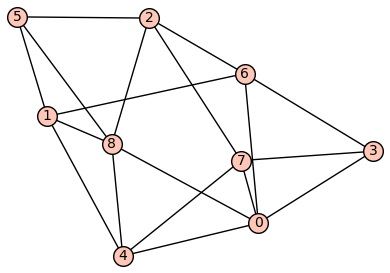

{0: [3, 4, 6, 7, 8], 1: [4, 5, 6, 8], 2: [5, 6, 7, 8], 3: [0, 6, 7], 4: [0, 1, 7, 8], 5: [1, 2, 8], 6: [0, 1, 2, 3], 7: [0, 2, 3, 4], 8: [0, 1, 2, 4, 5]}


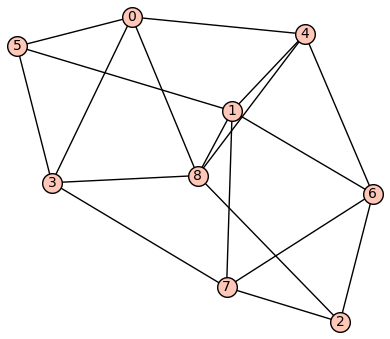

{0: [3, 4, 5, 8], 1: [4, 5, 6, 7, 8], 2: [6, 7, 8], 3: [0, 5, 7, 8], 4: [0, 1, 6, 8], 5: [0, 1, 3], 6: [1, 2, 4, 7], 7: [1, 2, 3, 6], 8: [0, 1, 2, 3, 4]}
Graphs corresponding to [-1, -1, -1, -1, 1, 1, 1, 1, 1, 2.009225118895955?, -1.297478794226097? - 0.683656934582031?*I, -1.297478794226097? + 0.683656934582031?*I, -0.711014524616318? - 0.973922406960507?*I, -0.711014524616318? + 0.973922406960507?*I, -0.520882725216705? - 1.085073993223050?*I, -0.520882725216705? + 1.085073993223050?*I, -0.1801172740348102? - 1.597893597295369?*I, -0.1801172740348102? + 1.597893597295369?*I, -0.1751944147702266? - 1.144535602863778?*I, -0.1751944147702266? + 1.144535602863778?*I, 0.1800322135601681? - 1.106877075817817?*I, 0.1800322135601681? + 1.106877075817817?*I, 0.3355447603327297? - 1.178580376972451?*I, 0.3355447603327297? + 1.178580376972451?*I, 0.8644981995232804? - 0.9292724705720313?*I, 0.8644981995232804? + 0.9292724705720313?*I]
[Graph on 9 vertices]


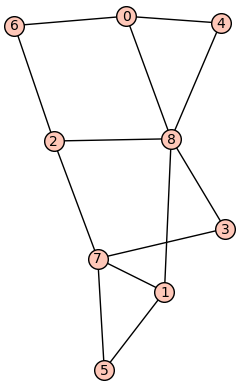

{0: [4, 6, 8], 1: [5, 7, 8], 2: [6, 7, 8], 3: [7, 8], 4: [0, 8], 5: [1, 7], 6: [0, 2], 7: [1, 2, 3, 5], 8: [0, 1, 2, 3, 4]}


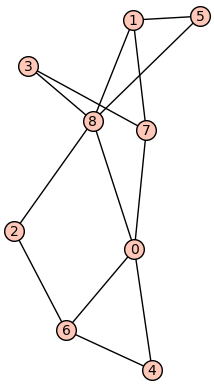

{0: [4, 6, 7, 8], 1: [5, 7, 8], 2: [6, 8], 3: [7, 8], 4: [0, 6], 5: [1, 8], 6: [0, 2, 4], 7: [0, 1, 3], 8: [0, 1, 2, 3, 5]}
Graphs corresponding to [-1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1.414213562373095?*I, 1.414213562373095?*I, 2.484438468053322?, -1.106915589736722? - 1.153380599600469?*I, -1.106915589736722? + 1.153380599600469?*I, -0.700897003518895? - 1.239589113994478?*I, -0.700897003518895? + 1.239589113994478?*I, -0.652053435170020? - 1.481160666597128?*I, -0.652053435170020? + 1.481160666597128?*I, -0.524581467462041? - 1.178280448429312?*I, -0.524581467462041? + 1.178280448429312?*I, -0.03193722228868282? - 1.502538415273623?*I, -0.03193722228868282? + 1.502538415273623?*I, 0.1947684460863023? - 1.294255441360731?*I, 0.1947684460863023? + 1.294255441360731?*I, 1.079397038063397? - 0.9085040063847784?*I, 1.079397038063397? + 0.9085040063847784?*I]
[Graph on 9 vertices]


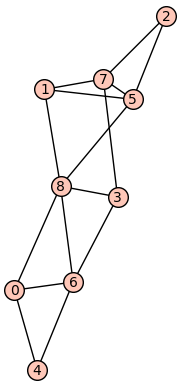

{0: [4, 6, 8], 1: [5, 7, 8], 2: [5, 7], 3: [6, 7, 8], 4: [0, 6], 5: [1, 2, 7, 8], 6: [0, 3, 4, 8], 7: [1, 2, 3, 5], 8: [0, 1, 3, 5, 6]}


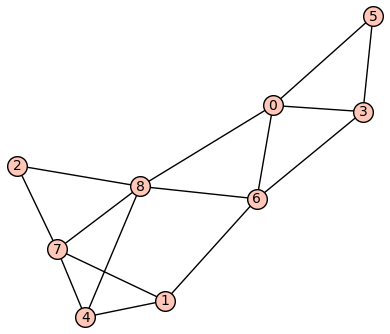

{0: [3, 5, 6, 8], 1: [4, 6, 7], 2: [7, 8], 3: [0, 5, 6], 4: [1, 7, 8], 5: [0, 3], 6: [0, 1, 3, 8], 7: [1, 2, 4, 8], 8: [0, 2, 4, 6, 7]}


In [39]:
'''
Most optimal way to find cospectral graphs
'''

Graph_List = graphs.nauty_geng("9 -c -d2")
spec_set = set()
spec_dict = {}

for G in Graph_List:
    spectrum = str(edge_adjacency_nb_matrix(G).eigenvalues())
    if spectrum in spec_dict:
        spec_set.add(spectrum)
        spec_dict[spectrum].append(G)
    else:
        spec_dict.update({spectrum: [G]})


for cospectrum in spec_set:
    print("Graphs corresponding to " + str(cospectrum))
    print(spec_dict[spectrum])
    for G in spec_dict[cospectrum]:
        G.show()
        print(G.to_dictionary())

In [42]:
#1st cospectral set on 9 vertices 

g1 = {0: [3, 4, 6, 7, 8], 1: [4, 5, 6, 8], 2: [5, 6, 7, 8], 3: [0, 6, 7], 4: [0, 1, 7, 8], 5: [1, 2, 8], 6: [0, 1, 2, 3], 7: [0, 2, 3, 4], 8: [0, 1, 2, 4, 5]}
g1 = Graph(g1)
g2 = {0: [3, 4, 5, 8], 1: [4, 5, 6, 7, 8], 2: [6, 7, 8], 3: [0, 5, 7, 8], 4: [0, 1, 6, 8], 5: [0, 1, 3], 6: [1, 2, 4, 7], 7: [1, 2, 3, 6], 8: [0, 1, 2, 3, 4]}
g2 = Graph(g2)

show_cospectrality(g1,g2)

#2nd cospectral set on 9 vertices

g1 = {0: [4, 6, 8], 1: [5, 7, 8], 2: [6, 7, 8], 3: [7, 8], 4: [0, 8], 5: [1, 7], 6: [0, 2], 7: [1, 2, 3, 5], 8: [0, 1, 2, 3, 4]}
g1 = Graph(g1)
g2 = {0: [4, 6, 7, 8], 1: [5, 7, 8], 2: [6, 8], 3: [7, 8], 4: [0, 6], 5: [1, 8], 6: [0, 2, 4], 7: [0, 1, 3], 8: [0, 1, 2, 3, 5]}
g2 = Graph(g2)

show_cospectrality(g1,g2)

#3rd cospectral set on 9 vertices

g1 = {0: [4, 6, 8], 1: [5, 7, 8], 2: [5, 7], 3: [6, 7, 8], 4: [0, 6], 5: [1, 2, 7, 8], 6: [0, 3, 4, 8], 7: [1, 2, 3, 5], 8: [0, 1, 3, 5, 6]}
g1 = Graph(g1)
g2 = {0: [3, 5, 6, 8], 1: [4, 6, 7], 2: [7, 8], 3: [0, 5, 6], 4: [1, 7, 8], 5: [0, 3], 6: [0, 1, 3, 8], 7: [1, 2, 4, 8], 8: [0, 2, 4, 6, 7]}
g2 = Graph(g2)

show_cospectrality(g1,g2)

Cospectrality
	Adjacency: True
	Laplacian: True
	Signless: True
	Ihara: True
	Nonbacktracking: True
Cospectrality
	Adjacency: False
	Laplacian: False
	Signless: False
	Ihara: True
	Nonbacktracking: True
Cospectrality
	Adjacency: False
	Laplacian: False
	Signless: False
	Ihara: True
	Nonbacktracking: True


In [22]:
"""
m = 6
d = 4
k = 4
C = zero_matrix(m,k)
C.set
print(C)
d_regular_graphs = graphs.nauty_geng(str(m) + " -c -d" + str(d) +" -D" + str(d))
d_regular_graphs_list = list(d_regular_graphs)
for graph in d_regular_graphs_list:
    show(graph)

all_graphs_order_k = graphs.nauty_geng(str(k) + "-c -d2")
all_graphs_order_k_list = list(all_graphs_order_k)
for graph in all_graphs_order_k_list:
    show(graph)

for g1 in d_regular_graphs_list:
    for g2 in all_graphs_order_k_list:
        pass


"""

'\nm = 6\nd = 4\nk = 4\nC = zero_matrix(m,k)\nC.set\nprint(C)\nd_regular_graphs = graphs.nauty_geng(str(m) + " -c -d" + str(d) +" -D" + str(d))\nd_regular_graphs_list = list(d_regular_graphs)\nfor graph in d_regular_graphs_list:\n    show(graph)\n\nall_graphs_order_k = graphs.nauty_geng(str(k) + "-c -d2")\nall_graphs_order_k_list = list(all_graphs_order_k)\nfor graph in all_graphs_order_k_list:\n    show(graph)\n\nfor g1 in d_regular_graphs_list:\n    for g2 in all_graphs_order_k_list:\n        pass\n\n\n'

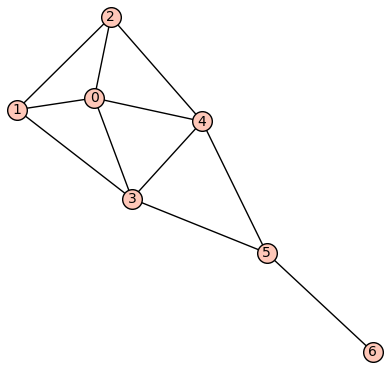

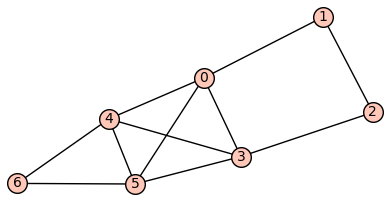

Cospectrality
	Adjacency: True
	Laplacian: False
	Signless: False
	Ihara: False
	Nonbacktracking: False


In [22]:
g1 = Graph({1:[0,2,3], 2:[0,4], 3:[0,4,5], 4:[0,5], 5:[6]})
g2 = Graph({3:[0,2,4,5], 1:[2,0], 4:[0,5,6], 5:[0,6]})
show(g1)
show(g2)

show_cospectrality(g1,g2)

In [58]:
#Generated all-cospectral graphs using two graphs on 6 vertices

C = matrix([[1,1,1,0,0,0], [1,0,1,1,0,0], [1,0,0,1,1,0], [0,1,0,0,1,1], [0,0,1,1,0,1], [0,1,0,0,1,1]])
g1 = Graph({0:[1,5], 4:[5,3], 2:[1,3]})
#g2 = Graph({5:[2,4], 3:[2,4], 1:[0,2]})

g2_graphs = graphs.nauty_geng("6")

for g2 in g2_graphs:
    graphs = GM_switch(g1,g2,C)

    GM_g1 = graphs[0]
    GM_g2 = graphs[1]

    if ihara_cospectral(GM_g1,GM_g2) == False:
        show(GM_g1,GM_g2)


graphs one and two are isomorphic: True


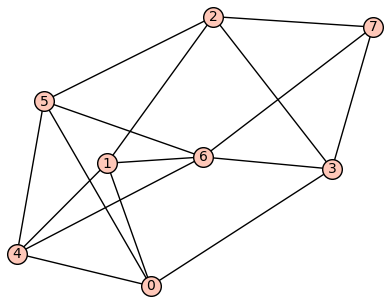

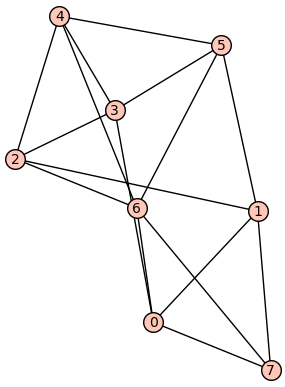

True
Cospectrality
	Adjacency: True
	Laplacian: True
	Signless: True
	Ihara: True
	Nonbacktracking: True


In [38]:
#Generated all-cospectral graphs using two graphs on 4 vertices. Unfortunately, they are isomorphic


C = matrix([[1,1,0,0], [1,0,1,0], [0,1,0,1], [0,0,1,1]])

g1 = Graph({0:[1,3], 2:[1,3]})
g2 = Graph({0:[1,2], 2:[1,3]})

graphs = GM_switch(g1,g2,C)
for G in graphs:
    show(G)

g1 = graphs[0]
g2 = graphs[1]

print(g1.is_isomorphic(g2))

show_cospectrality(g1,g2)

In [55]:
#Generated all-cospectral graphs using two graphs on 8 and 6 vertices


C = matrix([[1,1,1,0,0,0], [0,1,1,1,0,0], [0,0,1,1,1,0], [0,0,0,1,1,1], [1,0,0,0,1,1], [1,1,0,0,0,1], [1,0,1,0,0,1], [0,1,0,1,1,0]])
g1 = Graph({0:[1,7], 2:[1,3], 4:[3,5], 6:[5,7]})
#g2 = Graph({0:[1,2,3,4,5], 3:[1,2], 4:[5]})

g2_graphs = graphs.nauty_geng("6")

for g2 in g2_graphs:
    graphs = GM_switch(g1,g2,C)

    GM_g1 = graphs[0]
    GM_g2 = graphs[1]

    if ihara_cospectral(GM_g1,GM_g2) == False:
        show(GM_g1,GM_g2)

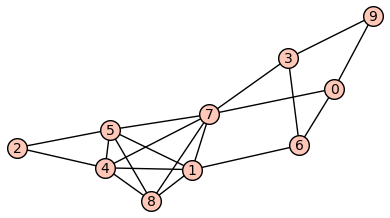

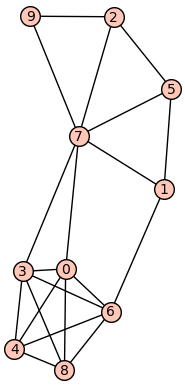

Cospectrality
	Adjacency: False
	Laplacian: False
	Signless: False
	Ihara: False
	Nonbacktracking: False


In [23]:
"""two non-isomorphic graphs with same degree seq, ihara-cospectral, but not cospectral in regard to four matrices"""

g1 = {0:[6,7,9], 6:[3,1], 7:[3,1,5,4], 4:[1,5,2], 5:[1,2], 8:[1,4,5,7], 9:[0,3]}
g1 = Graph(g1)
show(g1)

g2 = {0:[3,4,6,7], 3:[4,6,7], 6:[4,1], 5:[1,2,7], 7:[1,2], 8:[0,3,4,6], 9:[2,7]}
g2 = Graph(g2)
show(g2)

show_cospectrality(g1,g2)

#g1_nb = edge_adjacency_nb_matrix(g1)
#g2_nb = edge_adjacency_nb_matrix(g2)

#g1_nb_graph = DiGraph(g1_nb)
#g2_nb_graph = DiGraph(g2_nb)



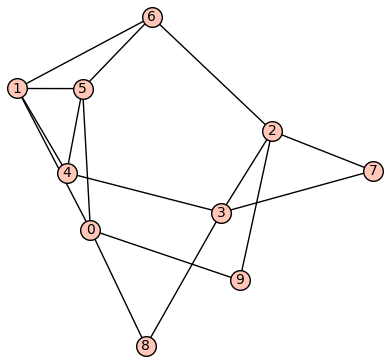

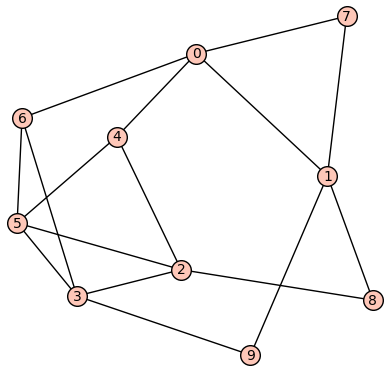

Cospectrality
	Adjacency: True
	Laplacian: True
	Signless: True
	Ihara: True
	Nonbacktracking: True


In [27]:
# ANOTHER NON-REGULAR GRAPH WHICH IS COSPECTRAL IN REGARDS TO IHARA MATRIX WITH MIN DEGREE 2

#Example from paper Dr. Kempton sent us 

g1 = {0:[1,5,8,9], 1:[4,5,6], 2:[3,6,7,9], 3:[4,7,8], 5:[4,6]}
g2 = {0:[1,4,6,7], 1:[7,8,9], 2:[4,5,8,3], 3:[5,6,9], 5:[4,6]}

g1 = Graph(g1)
g2 = Graph(g2)

show(g1)
show(g2)

show_cospectrality(g1,g2)

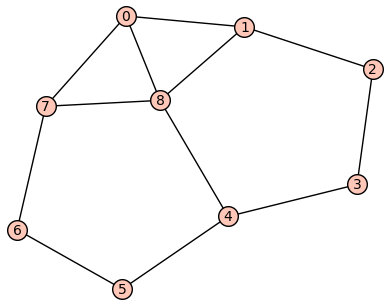

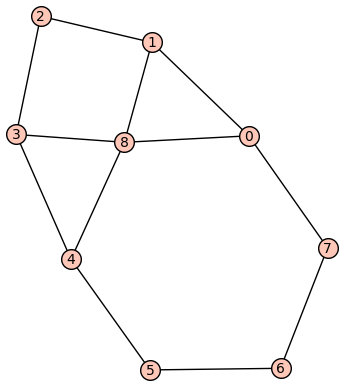

Cospectrality
	Adjacency: True
	Laplacian: False
	Signless: False
	Ihara: False
	Nonbacktracking: False


In [28]:
"""example of two adjacency-cospectral graphs with minimum degree at least 2"""

g1 = {0:[1,7,8], 1:[8,2], 3:[2,4], 5:[4,6], 7:[6,8], 8:[4]}
g1 = Graph(g1)
show(g1)
g2 = {0:[1,7,8], 1:[8,2], 3:[2,8,4], 5:[4,6], 7:[6], 8:[4]}
g2 = Graph(g2)
show(g2)

show_cospectrality(g1,g2)

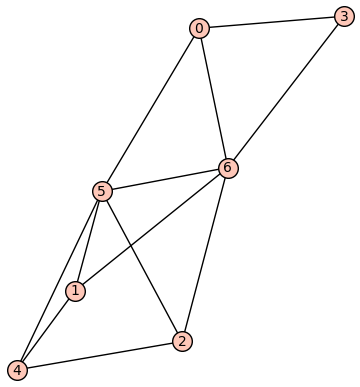

Is diagonalizable: False
[2.585399180895620?, 1, 0.6337669124478448? + 1.141714069356906?*I, 0.6337669124478448? - 1.141714069356906?*I, 0.?e-56 + 1.414213562373095?*I, 0.?e-56 - 1.414213562373095?*I, -0.3757575197436938? + 1.706562943488307?*I, -0.3757575197436938? - 1.706562943488307?*I, -1.050708983151961? + 1.128326170159466?*I, -1.050708983151961? - 1.128326170159466?*I, -0.50000000000000000? + 1.322875655532296?*I, -0.50000000000000000? + 1.322875655532296?*I, -0.50000000000000000? - 1.322875655532296?*I, -0.50000000000000000? - 1.322875655532296?*I]


In [30]:
#reconstructing the counter-example to our conjecture about the diagonalizability of Ihara matrices


g = {0:[3,6,5], 1:[4,5,6], 2:[4,5,6], 3:[0,6], 4:[1,2,5], 5:[0,1,2,4,6], 6:[0,3,5]}
sad_graph = Graph(g)
show(sad_graph)
k_sad = ihara_matrix(sad_graph)
print("Is diagonalizable: " + str(k_sad.is_diagonalizable()))
print(k_sad.eigenvalues())

In [34]:
#Testing several different graphs to see if they preserve their property of having an equitable partition


#G = Graph({})
#G.add_cycle([0,1,2,3])
#G.add_cycle([4,5,6,7])
#G.add_edges([(0,4),(1,5),(2,6),(3,7)])

G = graphs.CompleteBipartiteGraph(3,3)

G = DiGraph(edge_adjacency_nb_matrix(G))

print(G.is_equitable([[0,1],[2],[3,4]]))

#G = Graph({7:[0,1,3,5,6], 1:[0,2,3,5], 3:[2,4,5], 5:[4,6]})

#G = Graph({0:[1,2,3,6], 7:[1,4,5,6], 1:[2,4], 6:[3,5], 2:[3,4], 5:[3,4]})

#G = Graph({2:[0,1,3,4], 3:[1]})

show(G)
#print(G.adjacency_matrix())
#print()
#print(edge_adjacency_nb_matrix(G))

TypeError: Partition ([[0, 1], [2], [3, 4]]) is not valid for this graph: vertices are incorrect.

In [ ]:
#checking if nonbacktracking graph has an equitable partition

G = Graph({2:[0,1,3,4], 0:[1]})
#print(edge_adjacency_nb_matrix(G))
G = DiGraph(edge_adjacency_nb_matrix(G))
show(G)
print(G.coarsest_equitable_refinement([[0,2],[1,3],[4,5],[6,7],[8,9]]))
#G.is_equitable([[0,1],[2],[3,4]])
#G.is_equitable(P, quotient_matrix=True)

: 

In [ ]:
#checking if nonbacktracking graph has an equitable partition

G = Graph({3:[4,2,5], 2:[0,5], 4:[1,5]})
print(edge_adjacency_nb_matrix(G))
G = DiGraph(edge_adjacency_nb_matrix(G))
show(G)
print(G.is_equitable([[0,1],[2,8],[12,7],[4,9],[13,5],[3,10],[6,11]], quotient_matrix = True))

: 

In [ ]:
G = Graph({3:[0,1,2,4,5], 2:[0], 4:[1]})
print(edge_adjacency_nb_matrix(G))
G = DiGraph(edge_adjacency_nb_matrix(G))
show(G)
print(G.is_equitable([[0,4],[3,11],[10,13],[7,9],[6,8],[1,5],[2,12]], quotient_matrix = True))

: 

In [ ]:
#An example of proposition 5.3 calculating the eigenvalues of the Ihara Matrix of some graph on 9 vertices

G = deg_two_graph(6,0.5)
G.add_vertices([6, 7, 8])
G.add_edges([(6,0),(7,0),(8,7)])
show(G)
K = ihara_matrix(G)
print("Ihara matrix is diagonalizable: " + str(K.is_diagonalizable()))
print(G.adjacency_matrix().eigenvalues())
compute_K_evals(G)

: 

In [ ]:
"""testing cospectral 3-regular graphs on 16 vertices"""

g1 = {0:[1,3,7], 2:[3,1,4], 5:[4,6,7], 6:[4,8], 9:[8,7,11], 10:[3,8,12], 11:[1,15], 13:[12,14,15], 14:[12,15],}
g2 = {0:[1,6,9], 2:[1,3,4], 3:[4,11], 5:[4,6,7], 8:[6,7,10], 9:[11,12], 10:[1,15], 11:[7], 13:[12,14,15], 14:[12,15]}
g1 = Graph(g1)
g2 = Graph(g2)
show_cospectrality(g1,g2)

: 

In [ ]:
#using cospectral_graphs() built in function to find cospectral graphs
gen = graphs.nauty_geng("12 -d3 -D3")
len(list(gen))
#g = graphs.cospectral_graphs(12, graphs=graphs.nauty_geng(12, -d3, -D3))

: 

In [ ]:
g1 = {0:[2,3,4,5], 1:[2,3,4,5], 2:[3,6], 3:[4], 5:[4,7]}
g1 = Graph(g1)
show(g1)
g2 = {0:[2,3,4,5], 1:[2,3,4,5], 2:[3,6], 3:[4], 5:[4,7], 6:[7]}
g2 = Graph(g2)
show(g2)
print(g1.spectrum())
print(g2.spectrum())
are_cospectral(g1,g2)

: 

In [ ]:
#These are two really big bi-regular graphs that are supposed to be cospectral. I screwed it up though

g1 = {0:[1,5,15], 1:[2,10], 2:[3,7], 3:[4,12], 4:[5,9], 6:[5,11,7], 8:[7,13,9], 10:[9,11], 12:[11,13], 14:[13,16,22], 16:[17,33], 17:[15,18], 18:[19,48], 19:[20,49], 20:[21,50], 21:[22,53], 23:[15,22,23], 24:[25,48], 25:[26,49], 26:[27,50], 27:[28,53], 28:[29,34], 29:[30,35], 30:[31,36], 31:[32,37], 32:[33,38], 33:[47], 34:[39,41], 35:[42,40], 36:[39,43], 37:[40,44], 38:[39,45], 47:[40,46], 41:[42,46], 43:[42,44], 45:[44,46], 51:[48,50,52], 52:[49,53]}
g1 = Graph(g1)
g2 = {0:[1,5,33], 1:[2,10], 2:[3,7], 3:[4,12], 4:[5,9], 6:[5,11,7], 8:[7,13,9], 10:[9,11], 12:[11,13], 13:[34], 15:[16,32,47], 16:[17,48], 17:[18,49], 18:[19,50], 19:[20,51], 20:[21,52], 21:[22,47], 22:[23,48], 23:[24,49], 24:[25,50], 25:[26,51], 26:[27,52], 27:[28,33], 28:[29,34], 29:[30,35], 30:[31,36], 31:[32,37], 32:[38], 41:[33,42,46], 42:[34,43], 43:[35,44], 44:[36,45], 45:[37,46], 46:[38], 39:[35,37,40], 40:[36,38], 53:[47,49,51], 54:[48,50,52]}
g2 = Graph(g2)
print(g1.adjacency_matrix().eigenvalues() == g2.adjacency_matrix().eigenvalues())

: 

: 